In [2]:
import os
os.environ['CUDA_VISIBLE_DEVICES']='1'

from fastai import *
from fastai.vision import *
from batch_norm_vgg import VGG, make_layers
from batch_norm_callbacks import ICS, AccuracyList
import matplotlib.pyplot as plt
import time

In [3]:
data_path = untar_data(URLs.CIFAR)

In [4]:
data_path.ls()

[PosixPath('/data/students_home/fmameli/.fastai/data/cifar10/test'),
 PosixPath('/data/students_home/fmameli/.fastai/data/cifar10/train'),
 PosixPath('/data/students_home/fmameli/.fastai/data/cifar10/labels.txt')]

In [5]:
data = ImageDataBunch.from_folder(
                data_path, valid='test', size=32, bs=128
            ).split_by_idxs(
                train_idx=[0, 1, 2, 3, 4, 5, 5000, 5001, 5002,5003,5004,5005], valid_idx=[0, 1, 2, 3, 4, 5, 1000,1001, 1002,1003,1004,1005]
            ).label_from_folder(
            ).databunch(bs=4, num_workers=1, no_check=True)

In [6]:
vgg = VGG(make_layers(batch_norm=True), num_classes=data.c)
vgg.cuda()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD

In [9]:
vgg.modules

TypeError: 'method' object is not subscriptable

In [6]:
learn_vgg = Learner(data, vgg, opt_func=optimizer,
                               loss_func=criterion,
                               true_wd=False,
                               wd=0.,
                               bn_wd=False,
                               metrics=accuracy)

In [7]:
accList = AccuracyList(learn_vgg)

In [8]:
icsList = ICS(learn_vgg, num_classes=data.c, bn=True )

In [9]:
learn_vgg.fit(1, lr=0.01, callbacks=[accList, icsList])

epoch,train_loss,valid_loss,accuracy,time
0,0.767351,0.696751,0.000000,00:11


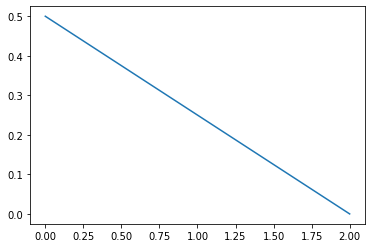

In [10]:
plt.plot(accList.accs)

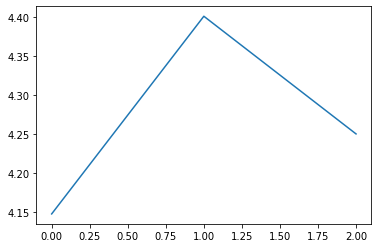

In [12]:
plt.plot(icsList.ics_values)

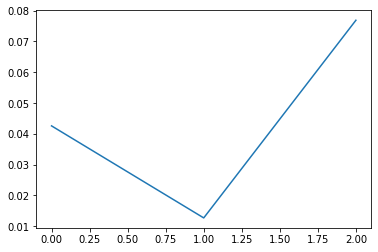

In [13]:
plt.plot(icsList.cos_values)